In [90]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 


%matplotlib inline
plt.rcParams['figure.figsize'] = (18,10)
plt.rcParams['font.size'] = 12
pd.set_option("display.max_rows", None, "display.max_columns", None)
plt.rcParams['figure.dpi'] = 70
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")

## Exploring the content of variables

In [137]:
df=pd.read_csv("/content/E-Commercedata1.csv",encoding = 'latin1')
df

# Basic Data cleaning processing 

In [85]:
df.shape

(541909, 8)

In [86]:
df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  12-01-2010 08:26       2.55     17850.0  United Kingdom  
1  12-01-2010 08:26       3.39     17850.0  United Kingdom  
2  12-01-2010 08:26       2.75     17850.0  United Kingdom  
3  12-01-2010 08:26       3.39     17850.0  United Kingdom  
4  12-01-2010 08:26       3.39     17850.0  United Kingdom

In [87]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [88]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

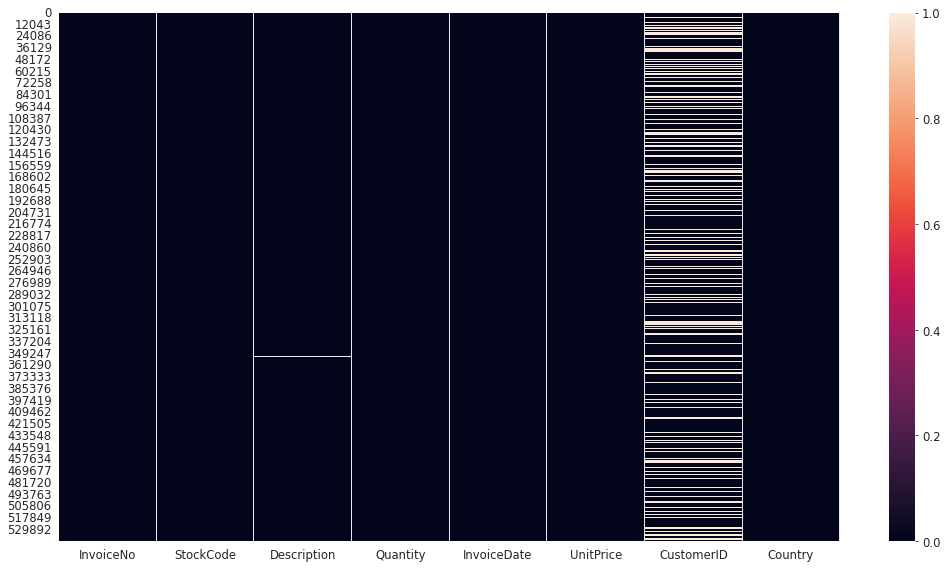

In [91]:
sns.heatmap(df.isnull())
plt.show()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [93]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [94]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [95]:
df['InvoiceDate']=pd.to_datetime(df.InvoiceDate)
df['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [96]:
print('Duplicate Entries: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Duplicate Entries: 5268


In [97]:
# I will have to drop the missing values/rows from the CustomerID
df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)
print('Dataframe dimensions:', df.shape)

Dataframe dimensions: (401604, 8)


In [139]:
temp_cou = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp_cou

Empty DataFrame
Columns: []
Index: [(12346.0, 541431, United Kingdom), (12346.0, C541433, United Kingdom), (12347.0, 537626, Iceland), (12347.0, 542237, Iceland), (12347.0, 549222, Iceland), (12347.0, 556201, Iceland), (12347.0, 562032, Iceland), (12347.0, 573511, Iceland), (12347.0, 581180, Iceland), (12348.0, 539318, Finland), (12348.0, 541998, Finland), (12348.0, 548955, Finland), (12348.0, 568172, Finland), (12349.0, 577609, Italy), (12350.0, 543037, Norway), (12352.0, 544156, Norway), (12352.0, 545323, Norway), (12352.0, 545332, Norway), (12352.0, 546869, Norway), (12352.0, 547390, Norway), (12352.0, 567505, Norway), (12352.0, 568699, Norway), (12352.0, 574275, Norway), (12352.0, C545329, Norway), (12352.0, C545330, Norway), (12352.0, C547388, Norway), (12353.0, 553900, Bahrain), (12354.0, 550911, Spain), (12355.0, 552449, Bahrain), (12356.0, 541430, Portugal), (12356.0, 549435, Portugal), (12356.0, 576895, Portugal), (12357.0, 574740, Switzerland), (12358.0, 559707, Austria), (12358.0, 581232, Austria), (12359.0, 540946, Cyprus), (12359.0, 543370, Cyprus), (12359.0, 555477, Cyprus), (12359.0, 571034, Cyprus), (12359.0, C549955, Cyprus), (12359.0, C580165, Cyprus), (12360.0, 554132, Austria), (12360.0, 563749, Austria), (12360.0, 571705, Austria), (12361.0, 545017, Belgium), (12362.0, 544203, Belgium), (12362.0, 551346, Belgium), (12362.0, 559295, Belgium), (12362.0, 563037, Belgium), (12362.0, 568651, Belgium), (12362.0, 570667, Belgium), (12362.0, 572887, Belgium), (12362.0, 573173, Belgium), (12362.0, 574329, Belgium), (12362.0, 580979, Belgium), (12362.0, C544902, Belgium), (12362.0, C563752, Belgium), (12362.0, C579178, Belgium), (12363.0, 549687, Unspecified), (12363.0, 563947, Unspecified), (12364.0, 563854, Belgium), (12364.0, 567897, Belgium), (12364.0, 573401, Belgium), (12364.0, 580152, Belgium), (12365.0, 544574, Cyprus), (12365.0, 544578, Cyprus), (12365.0, C544577, Cyprus), (12367.0, 580716, Denmark), (12370.0, 538826, Cyprus), (12370.0, 539330, Austria), (12370.0, 546236, Cyprus), (12370.0, 571905, Cyprus), (12371.0, 570521, Switzerland), (12371.0, 572770, Switzerland), (12372.0, 544157, Denmark), (12372.0, 552731, Denmark), (12372.0, 568872, Denmark), (12373.0, 542887, Austria), (12374.0, 576345, Austria), (12375.0, 565333, Finland), (12375.0, 579281, Finland), (12375.0, C581071, Finland), (12377.0, 539488, Switzerland), (12377.0, 542586, Switzerland), (12378.0, 562046, Switzerland), (12379.0, 557789, Belgium), (12379.0, 567196, Belgium), (12379.0, C559193, Belgium), (12380.0, 555739, Belgium), (12380.0, 567928, Belgium), (12380.0, 571187, Belgium), (12380.0, 577180, Belgium), (12380.0, C572532, Belgium), (12381.0, 563100, Norway), (12381.0, 570681, Norway), (12381.0, 570725, Norway), (12381.0, 574694, Norway), (12381.0, 580638, Norway), (12381.0, C565050, Norway), (12383.0, 539840, Belgium), ...]

In [99]:
countries = df['Country'].value_counts()

In [101]:
countries.index

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain', 'Netherlands',
       'Belgium', 'Switzerland', 'Portugal', 'Australia', 'Norway', 'Italy',
       'Channel Islands', 'Finland', 'Cyprus', 'Sweden', 'Austria', 'Denmark',
       'Japan', 'Poland', 'USA', 'Israel', 'Unspecified', 'Singapore',
       'Iceland', 'Canada', 'Greece', 'Malta', 'United Arab Emirates',
       'European Community', 'RSA', 'Lebanon', 'Lithuania', 'Brazil',
       'Czech Republic', 'Bahrain', 'Saudi Arabia'],
      dtype='object')

In [102]:
countries

United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [103]:
len(df['CustomerID'].value_counts())

4372

In [104]:
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),}], 
             columns = ['products', 'transactions', 'customers'], index = ['quantity'])

products  transactions  customers
quantity      3684         22190       4372

In [41]:
df1=df.drop(columns=["InvoiceNo"])
df1

StockCode                          Description  Quantity  \
0         85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1          71053                  WHITE METAL LANTERN         6   
2         84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...                                  ...       ...   
535327     85104                      ????damages????      -355   
535329     21693                             mixed up       -87   
535335     22578                                 lost     -1050   
537621    85123A   CREAM HANGING HEART T-LIGHT HOLDER         4   
540421     23843          PAPER CRAFT , LITTLE BIRDIE     80995   

             InvoiceDate  UnitPrice  CustomerID         Country  
0       12-01-2010 08:26       2.55     17850.0  United Kingdom  
1       12-01-2010 08:26       3.39     17850.0  United Kingdom  
2       12-01-2010 08:26       2.75     17850.0  United Kingdom  
3       12-01-2010 08:26       3.39     17850.0  United Kingdom  
4       12-01-2010 08:26       3.39     17850.0  United Kingdom  
...                  ...        ...         ...             ...  
535327  12-07-2011 18:32       0.00         NaN  United Kingdom  
535329  12-07-2011 18:34       0.00         NaN  United Kingdom  
535335  12-07-2011 18:38       0.00         NaN  United Kingdom  
537621  12-08-2011 12:07       2.95     17841.0  United Kingdom  
540421  12-09-2011 09:15       2.08     16446.0  United Kingdom  

[4223 rows x 7 columns]

# New Section

In [109]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Removing punctuation (.!<>{}’,”(/)-)



In [ ]:
df1["Description"]

In [111]:
df1['Description'] = df1['Description'].str.replace("[^a-zA-Z0-9]", " ")

In [ ]:
df1['Description']

# Replacing short words

In [73]:
df1["Description"] = df1["Description"].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df1["Description"]

0            WHITE HANGING HEART LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4               RED WOOLLY HOTTIE WHITE HEART
                         ...                 
535327                                damages
535329                                  mixed
535335                                   lost
537621       CREAM HANGING HEART LIGHT HOLDER
540421              PAPER CRAFT LITTLE BIRDIE
Name: Description, Length: 4223, dtype: object

# LowerCase character

In [74]:
df1['Description']=df1['Description'].str.lower()

In [75]:
df1['Description']

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
535327                                damages
535329                                  mixed
535335                                   lost
537621       cream hanging heart light holder
540421              paper craft little birdie
Name: Description, Length: 4223, dtype: object

# Remove stop words

In [76]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = ['childrens','circus','girls','boys']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df1['Description'] = [remove_stopwords(r) for r in df1['Description']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
# Removing stopwords
df1['Description'] = [remove_stopwords(r) for r in df1['Description']]

In [78]:
df1['Description']

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
535327                                damages
535329                                  mixed
535335                                   lost
537621       cream hanging heart light holder
540421              paper craft little birdie
Name: Description, Length: 4223, dtype: object

In [119]:
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")  # NLTK stemmer (Snowball stemmer)
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
                
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
            
            
    print("No. of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [133]:
df1['Description'] = pd.DataFrame(df1['Description'].unique()).rename(columns = {0:'Description'})

In [ ]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df1['Description'])

In [ ]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

In [ ]:
liste = sorted(list_products, key = lambda x:x[1], reverse = True)


plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(10, 30))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("No. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()


plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

# Lemmatization

In [122]:
# Begin Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df1['Description'] = df1['Description'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df1['Description'] 

# Plotting Freqent Words

In [131]:
df1

StockCode                          Description  Quantity  \
0             85123A        white hang heart light holder         6   
1              71053                  white metal lantern         6   
2             84406B        cream cupid heart coat hanger         8   
3             84029G     knit union flag hot water bottle         6   
4             84029E        red woolly hottie white heart         6   
5              22752                set babushka nest box         2   
6              21730        glass star frost light holder         6   
7              22633               hand warmer union jack         6   
8              22632            hand warmer red polka dot         6   
9              84879          assort colour bird ornament        32   
10             22745              poppy playhouse bedroom         6   
11             22748              poppy playhouse kitchen         6   
12             22749    feltcraft princess charlotte doll         8   
13             22310                  ivory knit mug cosy         6   
14             84969           box assort colour teaspoon         6   
15             22623             box vintage jigsaw block         3   
16             22622           box vintage alphabet block         2   
17             21754             home building block word         3   
18             21755             love building block word         3   
19             21777               recipe box metal heart         4   
20             48187                  doormat new england         4   
21             22960                   jam making set jar         6   
22             22913          red coat rack paris fashion         3   
23             22912       yellow coat rack paris fashion         3   
24             22914         blue coat rack paris fashion         3   
25             21756             bath building block word         3   
26             22728            alarm clock bakelike pink        24   
27             22727             alarm clock bakelike red        24   
28             22726           alarm clock bakelike green        12   
29             21724            panda bunny sticker sheet        12   
30             21883                       star gift tape        24   
31             10002           inflatable political globe        48   
32             21791          vintage head tail card game        24   
33             21035          set red retrospot tea towel        18   
34             22326     round snack box set of4 woodland        24   
35             22629                   spaceboy lunch box        24   
36             22659                lunch box love london        24   
37             22631                     parade lunch box        24   
38             22661      charlotte bag dolly girl design        20   
39             21731       red toadstool lead night light        24   
40             22900            set tea towel love london        24   
41             21913        vintage seaside jigsaw puzzle        12   
42             22540                   mini jigsaw parade        24   
43             22544                 mini jigsaw spaceboy        24   
44             22492               mini paint set vintage        36   
45              POST                              postage         3   
46             22086            paper chain kit christmas        80   
52             20679                edwardian parasol red         6   
53             37370              retro coffee mug assort         6   
54             21871                      save planet mug         6   
55             21071          vintage billboard drink mug         6   
56             21068      vintage billboard love hate mug         6   
57             82483     wood drawer cabinet white finish         2   
58             82486        wood cabinet ant white finish         4   
59             82482    wooden picture frame white finish         6   
60            82494L           wood

# WordCloud

# Bag of Words Model

In [124]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
# tmp_df = tfidf.fit_transform(df.review_processed)
# feature_names = tfidf.get_feature_names()
# pd.DataFrame(tmp_df.toarray(), columns = feature_names).head() 

M = tfidf.fit_transform(df1.Description_Case).toarray()


In [126]:
M

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(M) # standardise data
X_std


array([[-0.01574852, -0.02227144, -0.01574852, ..., -0.02226142,
        -0.01574852, -0.11013224],
       [-0.01574852, -0.02227144, -0.01574852, ..., -0.02226142,
        -0.01574852, -0.11013224],
       [-0.01574852, -0.02227144, -0.01574852, ..., -0.02226142,
        -0.01574852, -0.11013224],
       ...,
       [-0.01574852, -0.02227144, -0.01574852, ..., -0.02226142,
        -0.01574852, -0.11013224],
       [-0.01574852, -0.02227144, -0.01574852, ..., -0.02226142,
        -0.01574852, -0.11013224],
       [-0.01574852, -0.02227144, -0.01574852, ..., -0.02226142,
        -0.01574852, -0.11013224]])

In [ ]:
# Elbow plot
# We make a plot between k value and inertia
inertias = []  # storer inertia for all values of k 
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia'); 

Text(0.5, 1.0, 'Visualization of clustered data')

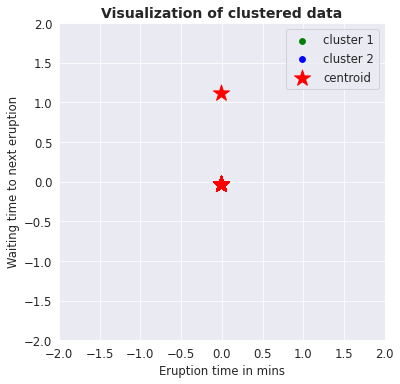

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(M) # standardise data


from sklearn.cluster import KMeans
km = KMeans(n_clusters=250) # applying k = 2
km.fit(X_std) # fit the data - identify pattern, does everything

centroids = km.cluster_centers_ # final centroid points
centroids
km.labels_ # measures how tight my groups are. 
km.inertia_

# # #Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='red', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')

In [129]:
M.shape

(4033, 1943)